<a href="https://colab.research.google.com/github/ntanphu/CST-KHMT-HK251/blob/main/Members/NguyenTanPhu/Yogi_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thuật toán tối ưu Yogi [[D2L (Section: 12.10.3)](https://d2l.ai/chapter_optimization/adam.html)]

Mặc dù Adam thường cho tốc độ hội tụ nhanh và hiệu quả thực nghiệm tốt, thuật toán này vẫn tồn tại hạn chế quan trọng đến từ cơ chế tích lũy moment bậc hai. Do moment này được cập nhật theo dạng trung bình động của các bình phương gradient không âm, nó có xu hướng tăng đơn điệu và dễ bị ảnh hưởng mạnh bởi một số giá trị gradient đột biến. Khi moment bậc hai phình to, bước cập nhật bị thu nhỏ một cách bất thường, khiến quá trình tối ưu hóa trở nên chậm hoặc thậm chí không tiến đến nghiệm mong muốn. Để khắc phục những hạn chế của Adam, Zaheer et al. (2018) đã đề xuất thuật toán Yogi, với mục tiêu chính: kiểm soát sự tăng lên không mong muốn của moment bậc hai, từ đó ổn định bước cập nhật.

Thay vì sử dụng moment bậc hai tăng đơn điệu như Adam, Yogi cập nhật:

\begin{equation}
	v_t = v_{t-1} + (1 - \beta_2) g_t^2 \, \mathrm{sgn}(g_t^2 - v_{t-1}),
\end{equation}

trong đó $\mathrm{sgn}(\cdot)$ là hàm dấu.

Ý nghĩa toán học:

*   Nếu $g_t^2 > v_{t-1}$, Yogi tăng $v_t$ một lượng nhỏ.
*   Nếu $g_t^2 < v_{t-1}$, Yogi giảm $v_t$, giúp moment bậc hai không bị phình to.
*   $v_t$ có xu hướng tiến về giá trị cân bằng phản ánh trung bình thực sự của gradient.

Moment bậc nhất vẫn giống Adam:
\begin{equation}
	m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t.
\end{equation}

Cập nhật tham số:
\begin{equation}
	\theta_{t+1} = \theta_t - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}.
\end{equation}

Nguyên lý chính của Yogi: Yogi không cho phép moment bậc hai tăng không giới hạn, mà điều chỉnh động theo quan hệ giữa $g_t^2$ và $v_{t-1}$. Điều này giúp: Bảo toàn sự ổn định của learning rate hiệu dụng; Tránh hiện tượng bước cập nhật bị triệt tiêu; Cải thiện hành vi hội tụ so với Adam, đặc biệt trong điều kiện gradient nhiễu hoặc xuất hiện không thường xuyên. Để hiện thực hóa cơ chế kiểm soát moment bậc hai như đã phân tích, thuật toán Yogi được xây dựng với các bước cập nhật cụ thể sau đây.

---
Algorithm 1. YOGI

---
**Input:** Initial point $x_1 \in \mathbb{R}^d$, learning rates $\{\eta_t\}_{t=1}^T$, hyperparameters $0 < \beta_1,\beta_2 < 1$, $\varepsilon > 0$  

**Initialize:** $m_0 = 0$, $v_0 = 0$

**For** $t = 1$ **to** $T$:

1. Sample $s_t$ from data distribution $P$
2. Compute stochastic gradient:  
   $
   g_t = \nabla_x \ell(x_t, s_t)
   $
3. Update first moment estimate:  
   $
   m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t
   $
4. Update second moment estimate (Yogi update):  
   $
   v_t = v_{t-1} + (1-\beta_2)\, g_t^2\, \mathrm{sgn}(g_t^2 - v_{t-1})
   $
5. Update parameters:  
   $
   x_{t+1} = x_t - \eta_t \frac{m_t}{\sqrt{v_t} + \varepsilon}
   $

**End For**

---

**Bài toán minh họa:** Xét bài toán tối ưu lồi một chiều:

$$
\min_{x\in\mathbb{R}} f(x), \qquad f(x) = \tfrac{1}{2}x^2,
$$

trong đó hàm mục tiêu $f$ là lồi và có nghiệm tối ưu duy nhất $x^\star = 0$. Gradient chính xác được cho bởi $\nabla f(x) = x$. Tuy nhiên, trong bối cảnh học máy, gradient thật thường không được quan sát trực tiếp mà chỉ có một ước lượng ngẫu nhiên chịu ảnh hưởng của nhiễu. Đặc biệt, nhiều bài toán thực tế gặp hiện tượng nhiễu có phương sai lớn hoặc xuất hiện các điểm bất thường (outliers) hiếm nhưng có giá trị rất lớn, gây khó khăn cho quá trình tối ưu hóa.

Để mô hình hóa hiện tượng này, tại mỗi bước lặp $t$, gradient quan sát được được biểu diễn bởi:
$$
g_t = x_t + \xi_t,
$$
với $\{\xi_t\}$ là dãy nhiễu ngẫu nhiên độc lập cùng phân phối, phần lớn bằng $0$ nhưng thỉnh thoảng nhận giá trị $\pm M$ với xác suất nhỏ $p$. Cụ thể:

$$
\xi_t =
\begin{cases}
	0, & 1-p,\\[2mm]
	+M, & p/2,\\
	-M, & p/2,
\end{cases}
\qquad p = 0.02,\quad M = 450.
$$

Do $\mathbb{E}[\xi_t] = 0$, ta có: $\mathbb{E}[g_t \mid x_t] = x_t = \nabla f(x_t),$
nên $g_t$ là ước lượng không chệch của gradient thật, nhưng có phương sai lớn do sự xuất hiện của các điểm bất thường hiếm. Hiện tượng này có thể khiến các thuật toán tối ưu thích nghi như Adam khuếch đại moment bậc hai, dẫn đến bước cập nhật quá lớn và làm chậm hoặc cản trở hội tụ.

Để khảo sát hành vi của các thuật toán trong môi trường nhiễu như vậy, ta mô phỏng quá trình tối ưu trên hàm $f(x)=\tfrac12 x^2$ với gradient nhiễu nêu trên, sử dụng cùng điều kiện khởi tạo $x_0 = 5$, các tham số:

$$
\alpha = 0.05, \qquad
\beta_1 = 0.9, \qquad
\beta_2 = 0.999,
$$

và chạy thuật toán Adam và Yogi trong $T = 4000$ bước lặp. Mục tiêu là quan sát sự khác biệt trong hành vi hội tụ khi gradient chứa các điểm bất thường giá trị lớn, qua đó đánh giá khả năng ổn định và tính bền vững của hai thuật toán. Để đánh giá cụ thể tác động của nhiễu dạng ``điểm bất thường'' lên các thuật toán tối ưu thích nghi, ta tiến hành mô phỏng Adam và Yogi trên cùng bài toán, cùng mức nhiễu và cùng tham số điều khiển. Để tiện phân tích, quá trình mô phỏng lưu lại các đại lượng sau theo từng bước lặp:

*  Giá trị tham số $x_t$;
*  Moment bậc hai $v_t$;
*  Thay đổi moment $\Delta v_t = v_t - v_{t-1}$;
*  Độ lớn bước cập nhật $\lvert \Delta x_t \rvert$;
*  Vị trí xuất hiện điểm bất thường trong chuỗi nhiễu.

Các kết quả thực nghiệm được trình bày dưới dạng bảng và hình minh họa để làm rõ sự khác biệt giữa hai thuật toán.

**a) Ảnh hưởng của điểm bất thường tới moment bậc hai:**
Bảng 3.4 trình bày giá trị moment bậc hai $v_t$ và độ lớn bước cập nhật $\lvert \Delta x_t \rvert$ tại một số bước lặp nơi xảy ra điểm bất thường (nhiễu có độ lớn $\pm 450$). Các giá trị được lấy trực tiếp từ quá trình chạy mô phỏng.

*  **Adam:** moment bậc hai $v_t$ tăng vọt mạnh ngay tại thời điểm xuất hiện điểm bất thường.

*  **Yogi:** mức tăng của $v_t$ được kiểm soát tốt hơn nhờ cơ chế cập nhật cho phép moment bậc hai có thể tăng hoặc giảm một cách thích hợp.

*  Hệ quả là độ lớn bước cập nhật $\lvert \Delta x_t \rvert$ của Adam giảm đột ngột (bị thu nhỏ mạnh), trong khi Yogi duy trì được bước cập nhật đều và ổn định hơn.

<center>
<p style="text-align: center;"><b>Bảng 3.4: Giá trị $v_t$ và $|\Delta x_t|$ tại các bước lặp có điểm bất thường</b></p>

<table border="1" cellspacing="0" cellpadding="6" style="margin-left:auto; margin-right:auto; border-collapse: collapse; text-align:center;">
  <tr>
    <th>$t$</th>
    <th>$\xi_t$</th>
    <th>$v_t^A$</th>
    <th>$v_t^Y$</th>
    <th>$|\Delta x_t^A|$</th>
    <th>$|\Delta x_t^Y|$</th>
  </tr>
  <tr><td>27</td><td>-450.0</td><td>199.653463</td><td>199.657420</td><td>0.025244</td><td>0.025242</td></tr>
  <tr><td>28</td><td>450.0</td><td>405.346427</td><td>405.553760</td><td>0.003630</td><td>0.003630</td></tr>
  <tr><td>78</td><td>-450.0</td><td>585.466719</td><td>604.130106</td><td>0.023405</td><td>0.023038</td></tr>
  <tr><td>95</td><td>450.0</td><td>781.758941</td><td>809.849404</td><td>0.022215</td><td>0.021828</td></tr>
  <tr><td>172</td><td>-450.0</td><td>924.142990</td><td>1008.313391</td><td>0.027169</td><td>0.026000</td></tr>
  <tr><td>195</td><td>450.0</td><td>1109.188927</td><td>1213.822220</td><td>0.028198</td><td>0.026958</td></tr>
  <tr><td>240</td><td>-450.0</td><td>1266.306127</td><td>1418.709990</td><td>0.031591</td><td>0.029857</td></tr>
  <tr><td>253</td><td>-450.0</td><td>1449.846331</td><td>1618.428072</td><td>0.018381</td><td>0.017807</td></tr>
  <tr><td>276</td><td>450.0</td><td>1622.443171</td><td>1823.595301</td><td>0.027554</td><td>0.026005</td></tr>
  <tr><td>309</td><td>-450.0</td><td>1769.961067</td><td>2023.207519</td><td>0.025007</td><td>0.023366</td></tr>
</table>
</center>

**Cơ chế cập nhật trong giai đoạn hội tụ:** Để đánh giá độ ổn định dài hạn, ta thống kê trung bình và độ lệch chuẩn của $|\Delta x_t|$ trên $1000$ bước lặp cuối. Bảng 3.5 cho thấy:

*  **Adam:** có bước cập nhật trung bình nhỏ hơn đáng kể, do $v_t$ đã tích lũy lớn trong nhiều điểm bất thường trước đó $\rightarrow$ learning rate hiệu dụng giảm mạnh.

*  **Yogi:** giữ được $|\Delta x_t|$ lớn hơn và ổn định hơn, phản ánh khả năng chống nhiễu và duy trì tốc độ hội tụ tốt hơn.

<center>
<p style="text-align: center;"><b>Bảng 3.5 Thống kê độ lớn bước cập nhật trong 1000 bước lặp cuối</b></p>

<table border="1" cellspacing="0" cellpadding="6" style="margin-left:auto; margin-right:auto; border-collapse: collapse; text-align:center;">
  <tr>
    <th>Metric</th>
    <th>Adam</th>
    <th>Yogi</th>
  </tr>
  <tr>
    <td>Mean($|\Delta x_t|$)</td>
    <td>0.006237</td>
    <td>0.003241</td>
  </tr>
  <tr>
    <td>Std($|\Delta x_t|$)</td>
    <td>0.010068</td>
    <td>0.005183</td>
  </tr>
</table>
</center>


Hình ô (2 và 3) trong phần thực nghiệm ở dưới, mô tả giá trị hàm mục tiêu $f(x_t)$ theo số bước lặp. Cả hai thuật toán đều hội tụ về nghiệm tối ưu $x^\star = 0$, tuy nhiên cơ chế hội tụ của chúng khác biệt đáng kể dưới tác động của nhiễu dạng điểm bất thường. Đường cong của Adam xuất hiện các đoạn chững lại rõ rệt, nguyên nhân là các điểm bất thường làm moment bậc hai $v_t$ tăng đột ngột, khiến bước cập nhật bị thu nhỏ mạnh và làm chậm tốc độ hội tụ. Ngược lại, Yogi cho thấy quỹ đạo hội tụ mượt hơn và ổn định hơn, đặc biệt trong giai đoạn cuối khi thuật toán tiến gần nghiệm tối ưu. Điều này phản ánh khả năng kiểm soát moment bậc hai và chống nhiễu tốt hơn của Yogi.


Hình ô (4 và 5) minh họa sự khác biệt về động học của moment bậc hai giữa hai thuật toán. Đối với Adam, $v_t$ tăng đều theo thời gian và đặc biệt phình to ngay tại những bước xuất hiện điểm bất thường; do cơ chế cập nhật luôn cộng $(g_t^2)$, $v_t$ gần như không bao giờ giảm. Hệ quả là learning rate hiệu dụng bị giảm dần, khiến tốc độ tối ưu hóa chậm lại trong giai đoạn sau. Trái lại, Yogi cho phép $v_t$ tăng hoặc giảm có kiểm soát thông qua nhân tử $\operatorname{sign}(g_t^2 - v_t)$, từ đó duy trì được moment bậc hai ổn định hơn và tránh tình trạng phình to quá mức. Đây là yếu tố cốt lõi giúp Yogi đạt độ ổn định cao hơn trong môi trường có các điểm nhiễu lớn hiếm gặp.


#### Mã nguồn thực nghiệm



In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

# ============================================================
#  MÔ PHỎNG BÀI TOÁN
# ============================================================

T  = 4000      # number of iterations
lr = 0.05      # learning rate (alpha)
b1 = 0.9       # beta1
b2 = 0.999     # beta2
p  = 0.02      # probability of a spike
M  = 450.0     # spike magnitude
seed = 0       # random seed

def simulate_adam_yogi(T, lr, b1, b2, p, M, seed=0):
    rng = np.random.default_rng(seed)

    # initial parameter
    xA = 5.0   # Adam
    xY = 5.0   # Yogi

    # first and second moments
    mA = vA = 0.0
    mY = vY = 0.0

    # history containers
    xsA, xsY = [], []
    vsA, vsY = [], []
    dvsA, dvsY = [], []    # Δv_t
    stepsA, stepsY = [], []  # |Δx_t|
    xis = []               # noise xi_t
    spike_indices = []     # indices where spike occurs

    for t in range(1, T + 1):
        # ----------------------------
        # sample noise xi_t
        # ----------------------------
        u = rng.uniform()
        if u < 1 - p:
            xi = 0.0
        elif u < 1 - p/2:
            xi = M
        else:
            xi = -M

        if xi != 0.0:
            spike_indices.append(t-1)  # zero-based index for plotting

        xis.append(xi)

        # noisy gradient
        gA = xA + xi
        gY = xY + xi

        # ----------------- Adam -----------------
        vA_prev = vA

        mA = b1 * mA + (1 - b1) * gA
        vA = b2 * vA + (1 - b2) * (gA ** 2)

        mA_hat = mA / (1 - b1 ** t)
        vA_hat = vA / (1 - b2 ** t)

        stepA = lr * mA_hat / (math.sqrt(vA_hat) + 1e-8)
        xA -= stepA

        # ----------------- Yogi -----------------
        vY_prev = vY

        mY = b1 * mY + (1 - b1) * gY
        # Yogi second moment update
        vY = vY + (1 - b2) * (gY ** 2) * np.sign((gY ** 2) - vY)

        mY_hat = mY / (1 - b1 ** t)
        vY_hat = vY / (1 - b2 ** t)

        stepY = lr * mY_hat / (math.sqrt(vY_hat) + 1e-8)
        xY -= stepY

        # save history
        xsA.append(xA); xsY.append(xY)
        vsA.append(vA); vsY.append(vY)
        dvsA.append(vA - vA_prev); dvsY.append(vY - vY_prev)
        stepsA.append(abs(stepA)); stepsY.append(abs(stepY))

    return (
        np.array(xsA), np.array(xsY),
        np.array(vsA), np.array(vsY),
        np.array(dvsA), np.array(dvsY),
        np.array(stepsA), np.array(stepsY),
        np.array(xis), spike_indices
    )

# Chạy mô phỏng
(xsA, xsY,
 vsA, vsY,
 dvsA, dvsY,
 stepsA, stepsY,
 xis, spike_idx) = simulate_adam_yogi(T, lr, b1, b2, p, M, seed)

# Trục thời gian & giá trị hàm mục tiêu
t_axis = np.arange(1, T + 1)
fA = 0.5 * xsA**2
fY = 0.5 * xsY**2

print(f"Final results after T = {T} iterations")
print(f"  Adam:  x_T = {xsA[-1]:.4f},    f(x_T) = {fA[-1]:.4f}")
print(f"  Yogi:  x_T = {xsY[-1]:.4f},    f(x_T) = {fY[-1]:.4f}")
print()

print("Mean |Δx_t| over last 1000 iterations:")
print(f"  Adam: {stepsA[-1000:].mean():.4e}")
print(f"  Yogi: {stepsY[-1000:].mean():.4e}")
print()

print(f"Min Δv_t (Adam): {dvsA.min():.4e}")
print(f"Min Δv_t (Yogi): {dvsY.min():.4e}   <= 0 shows v_t can decrease")



Final results after T = 4000 iterations
  Adam:  x_T = 0.8376,    f(x_T) = 0.3508
  Yogi:  x_T = 0.9599,    f(x_T) = 0.4607

Mean |Δx_t| over last 1000 iterations:
  Adam: 6.2368e-03
  Yogi: 3.2406e-03

Min Δv_t (Adam): -4.4682e+00
Min Δv_t (Yogi): -1.4505e-02   <= 0 shows v_t can decrease


In [ ]:
# ============================================================
# 1. ẢNH HƯỞNG CỦA SPIKE TỚI moment bậc hai (Bảng spike)
# ============================================================

max_rows = 10  # số spike đầu tiên để minh họa trong bảng (có thể tăng)
rows_spike = []

for idx in spike_idx[:max_rows]:
    rows_spike.append({
        "t": idx + 1,
        "xi_t": xis[idx],
        "vA_t": vsA[idx],
        "vY_t": vsY[idx],
        "|stepA_t|": stepsA[idx],
        "|stepY_t|": stepsY[idx],
    })

table_spike = pd.DataFrame(rows_spike)
table_spike

,t,xi_t,vA_t,vY_t,|stepA_t|,|stepY_t|
0,27,-450.0,199.653463,199.657420,0.025244,0.025242
1,28,450.0,405.346427,405.553760,0.003630,0.003630
2,78,-450.0,585.466719,604.130106,0.023405,0.023038
3,95,450.0,781.758941,809.849404,0.022215,0.021828
4,172,-450.0,924.142903,1008.313391,0.027169,0.026003
5,195,450.0,1109.188927,1213.822202,0.028198,0.026958
6,240,450.0,1266.306162,1418.790990,0.031591,0.029857
7,253,-450.0,1449.846334,1618.428072,0.018831,0.017807
8,276,450.0,1622.441371,1823.595301,0.027554,0.026005
9,309,-450.0,1769.961067,2023.207519,0.025007,0.023366


In [ ]:
# ============================================================
# 2. CƠ CHẾ BƯỚC CẬP NHẬT GIAI ĐOẠN CUỐI (Bảng thống kê)
# ============================================================

tail = 1000  # 1000 bước cuối
table_steps = pd.DataFrame({
    "Metric": ["Mean(|Δx_t| last 1000)", "Std(|Δx_t| last 1000)"],
    "Adam": [stepsA[-tail:].mean(), stepsA[-tail:].std()],
    "Yogi": [stepsY[-tail:].mean(), stepsY[-tail:].std()]
})

table_steps

,Metric,Adam,Yogi
0,Mean(|Δx_t| last 1000),0.006237,0.003241
1,Std(|Δx_t| last 1000),0.010068,0.005183


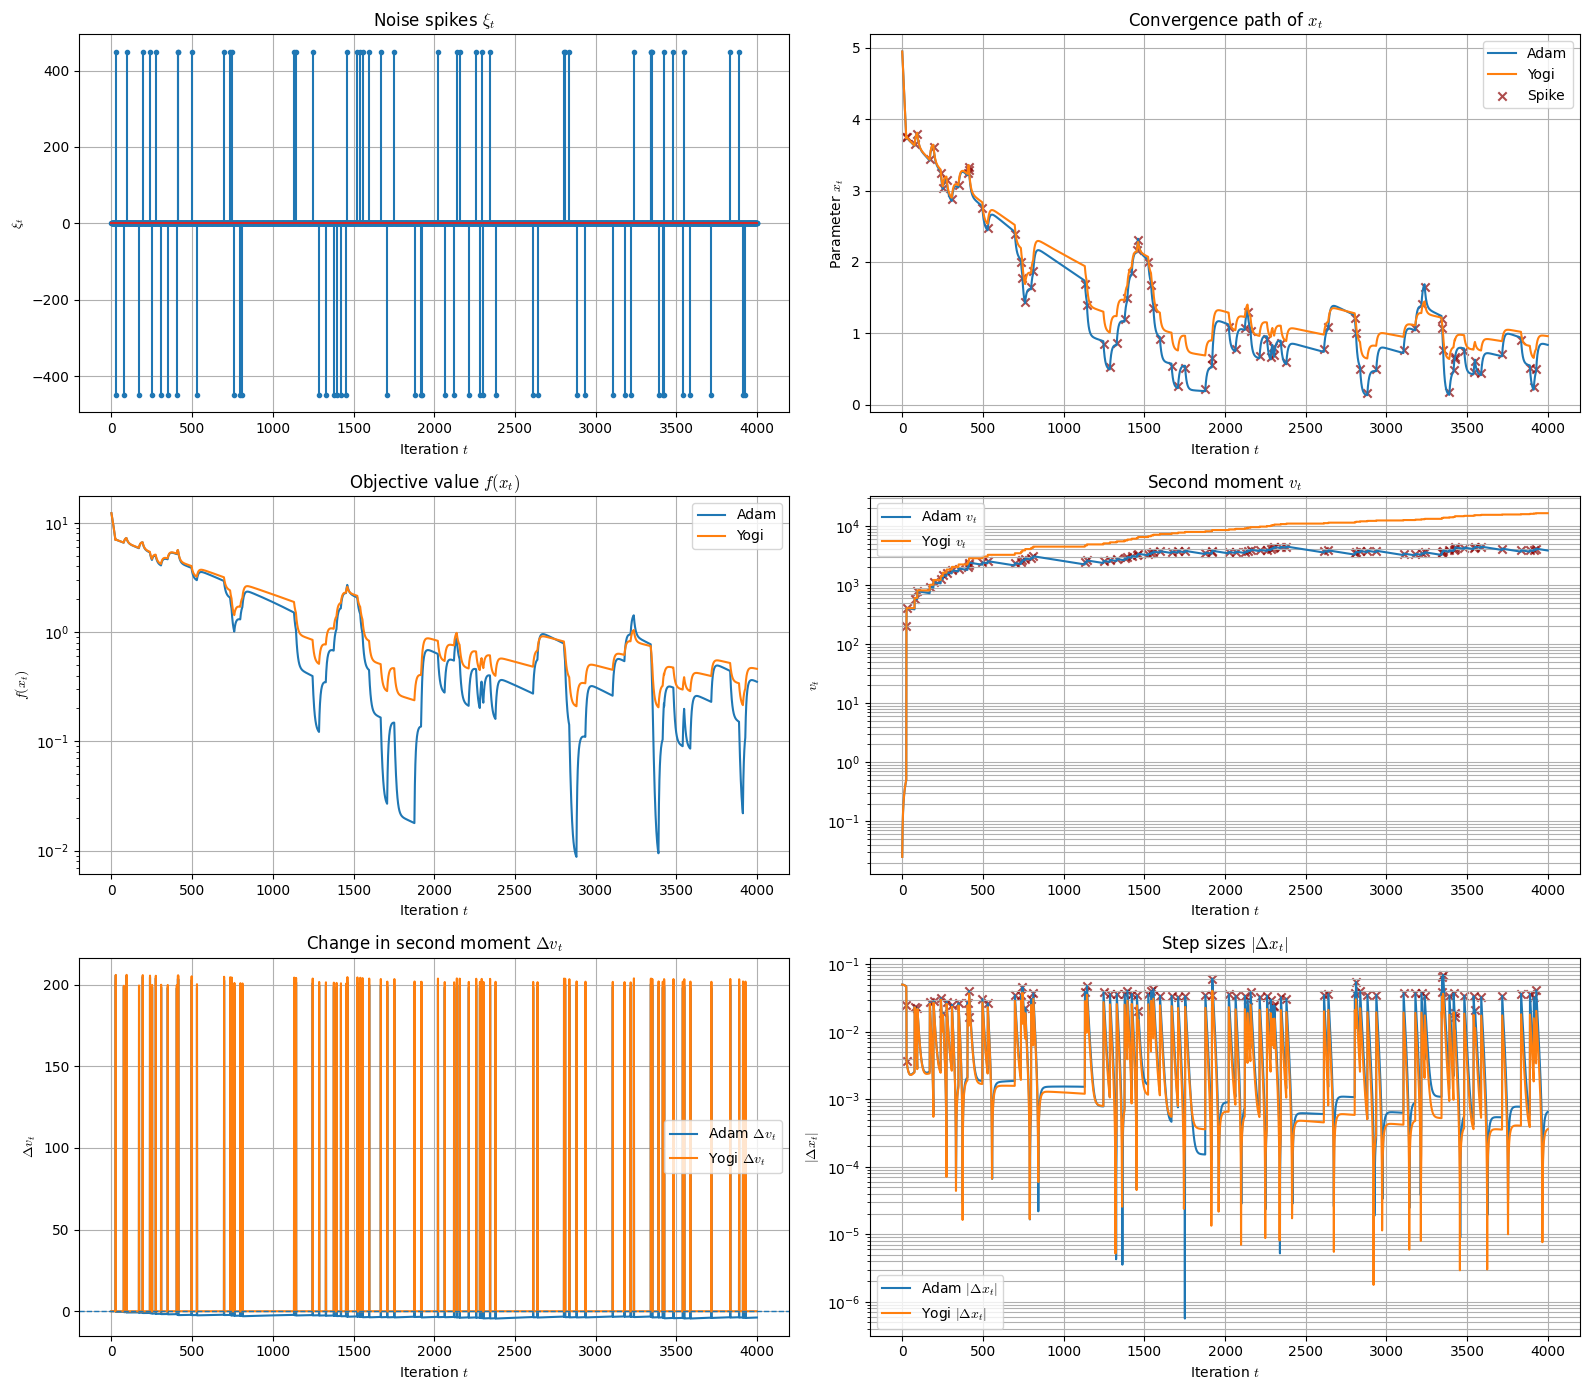

In [ ]:
# ============================================================
#  PLOTS – 6 FIGURES, arranged 3 rows × 2 columns
# ============================================================
plt.rcParams['mathtext.fontset'] = 'cm'
t_axis = np.arange(T)

fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.flatten()

# 1. Noise spikes
axes[0].stem(t_axis, xis, markerfmt=".")
axes[0].set_title("Noise spikes $\\xi_t$")
axes[0].set_xlabel("Iteration $t$")
axes[0].set_ylabel("$\\xi_t$")
axes[0].grid(True)

# 2. Trajectory x_t
axes[1].plot(t_axis, xsA, label="Adam")
axes[1].plot(t_axis, xsY, label="Yogi")
axes[1].scatter(spike_idx, xsA[spike_idx], color="darkred", marker="x", label="Spike", alpha=0.7)
axes[1].set_title("Convergence path of $x_t$")
axes[1].set_xlabel("Iteration $t$")
axes[1].set_ylabel("Parameter $x_t$")
axes[1].legend()
axes[1].grid(True)

# 3. Objective value
axes[2].plot(t_axis, fA, label="Adam")
axes[2].plot(t_axis, fY, label="Yogi")
axes[2].set_yscale("log")
axes[2].set_title("Objective value $f(x_t)$")
axes[2].set_xlabel("Iteration $t$")
axes[2].set_ylabel("$f(x_t)$")
axes[2].legend()
axes[2].grid(True)

# 4. Second moment v_t (log scale)
axes[3].plot(t_axis, vsA, label="Adam $v_t$")
axes[3].plot(t_axis, vsY, label="Yogi $v_t$")
axes[3].scatter(spike_idx, vsA[spike_idx], color="darkred", marker="x", alpha=0.7)
axes[3].set_yscale("log")
axes[3].set_title("Second moment $v_t$")
axes[3].set_xlabel("Iteration $t$")
axes[3].set_ylabel("$v_t$")
axes[3].legend()
axes[3].grid(True, which="both")

# 5. Δv_t (change in second moment)
axes[4].plot(t_axis, dvsA, label="Adam $\\Delta v_t$")
axes[4].plot(t_axis, dvsY, label="Yogi $\\Delta v_t$")
axes[4].axhline(0, linestyle="--", linewidth=1)
axes[4].set_title("Change in second moment $\\Delta v_t$")
axes[4].set_xlabel("Iteration $t$")
axes[4].set_ylabel("$\\Delta v_t$")
axes[4].legend()
axes[4].grid(True)

# 6. Step sizes |Δx_t| (log scale)
axes[5].plot(t_axis, stepsA, label="Adam $|\\Delta x_t|$")
axes[5].plot(t_axis, stepsY, label="Yogi $|\\Delta x_t|$")
axes[5].scatter(spike_idx, stepsA[spike_idx], color="darkred", marker="x", alpha=0.7)
axes[5].set_yscale("log")
axes[5].set_title("Step sizes $|\\Delta x_t|$")
axes[5].set_xlabel("Iteration $t$")
axes[5].set_ylabel("$|\\Delta x_t|$")
axes[5].legend()
axes[5].grid(True, which="both")

plt.tight_layout()
plt.show()


#### Kết luận:

Thí nghiệm trên hàm lồi $f(x) = \frac{1}{2}x^{2}$
với gradient nhiễu chứa các spike hiếm cho thấy cả Adam và Yogi đều tiến về vùng lân cận nghiệm tối ưu, thể hiện hành vi hội tụ ngay cả trong môi trường nhiễu mạnh. Tuy nhiên, kết quả và các biểu đồ minh họa cho thấy sự khác biệt rõ ràng giữa hai thuật toán trong cách xử lý gradient bất thường.

Thứ nhất, moment bậc hai của Adam tăng đơn điệu và bị đẩy lên đáng kể sau mỗi spike. Biểu đồ $v_t$ và $\Delta v_t$ xác nhận rằng
$\Delta v_t^{Adam}$ hầu như luôn không âm, dẫn đến việc $v_t$
bị phóng đại kéo dài. Điều này làm giảm đáng kể bước cập nhật do mẫu số $v_t$ trở nên rất lớn. Quan sát từ biểu đồ $|\Delta x_t|$ cho thấy Adam thường rơi vào trạng thái bước đi rất nhỏ trong nhiều vòng lặp sau các điểm bất thường.

Thứ hai, Yogi thể hiện cơ chế điều chỉnh moment bậc hai linh hoạt hơn.
Biểu đồ $\Delta v_t$ cho thấy Yogi có cả giá trị dương và âm, chứng tỏ $v_t$ có thể tăng, giảm khi gặp điểm bất thường và gradient trở lại ổn định. Nhờ đó, moment bậc hai không bị tích lũy quá mức, dẫn đến bước cập nhật ổn định và ít khi bị triệt tiêu như ở Adam.

Tổng thể, các biểu đồ và số liệu thực nghiệm minh họa đúng hạn chế cấu trúc của Adam khi gặp gradient điểm bất thường — cụ thể là việc moment bậc hai tăng không kiểm soát và bước cập nhật suy giảm đáng kể. Ngược lại, Yogi khắc phục được vấn đề này nhờ cơ chế cập nhật moment bậc hai có dấu, từ đó duy trì được tốc độ học ổn định hơn trong môi trường nhiễu nặng.





### Thực nghiệm minh họa với bài toán phân loại thực tế MNIST.

In [1]:
#Import Libraries
import time
import copy
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.dataset import random_split
from torch.utils.data.sampler import SubsetRandomSampler, SequentialSampler
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import Optimizer

In [2]:
num_epochs = 20
num_classes = 10
batch_size = 128
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
%%capture
# =========================
# 2. DataLoader + tiền xử lý
# =========================
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

train_dataset = torchvision.datasets.MNIST('data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST('data', train=False, transform=transform)

# Before
print('Train data set:', len(train_dataset))
print('Test data set:', len(test_dataset))

# Random split
train_set_size = int(len(train_dataset) * 0.8)
indices = list(range(train_set_size))
split = int(np.floor(.2 * train_set_size))
train_indices, val_indices = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_indices)
valid_sampler =  SequentialSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, sampler=train_sampler,batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(dataset=train_dataset,sampler=valid_sampler,batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)

#### Mô hình Multilayer Perceptron (MLP)

In [4]:
class NeuralNet(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, act_func=nn.ReLU()):
        super(NeuralNet, self).__init__()
        layers = []
        layers.append(nn.Linear(in_channels, hidden_channels[0]))
        layers.append(act_func) # activation function
        # Hidden layers
        for i in range(1, len(hidden_channels)):
            layers.append(nn.Linear(hidden_channels[i-1], hidden_channels[i]))
            layers.append(act_func) # activation function
        layers.append(nn.Linear(hidden_channels[-1], out_channels))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        out = self.net(x)
        return out

In [5]:
def train_val_model(model, criterion, optimizer, dataloaders, num_epochs=25,
        scheduler=None, log_interval=None):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # Store losses and accuracies accross epochs
    losses, accuracies = dict(train=[], val=[]), dict(train=[], val=[])

    for epoch in range(num_epochs):
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            nsamples = 0
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.reshape(-1, 1*28*28).to(device)
                labels = labels.to(device)
                nsamples += inputs.shape[0]

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if scheduler is not None and phase == 'train':
                scheduler.step()

            #nsamples = dataloaders[phase].dataset.data.shape[0]
            epoch_loss = running_loss / nsamples
            epoch_acc = running_corrects.double() / nsamples

            losses[phase].append(epoch_loss)
            accuracies[phase].append(epoch_acc)

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        if log_interval is not None and epoch % log_interval == 0:
            print(f"Epoch {epoch+1:02d}/{num_epochs:02d} | "
                  f"train_loss={losses['train'][-1]:.4f} acc={accuracies['train'][-1]:.5f} | "
                  f"val_loss={losses['val'][-1]:.4f} acc={accuracies['val'][-1]:.5f}")

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:.5f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, losses, accuracies

In [6]:
# =========================
# 4. Định nghĩa Yogi Optimizer
# =========================
class Yogi(Optimizer):
    def __init__(self, params, lr=1e-3,
                 betas=(0.9, 0.999),
                 eps=1e-8,
                 weight_decay=0.0):
        if lr <= 0.0:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta1 value: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta2 value: {}".format(betas[1]))

        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay)
        super(Yogi, self).__init__(params, defaults)

    @torch.no_grad()
    def step(self, closure=None):
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            lr = group["lr"]
            beta1, beta2 = group["betas"]
            eps = group["eps"]
            wd = group["weight_decay"]

            for p in group["params"]:
                if p.grad is None:
                    continue
                grad = p.grad

                if grad.is_sparse:
                    raise RuntimeError("Yogi does not support sparse gradients")

                # weight decay
                if wd != 0:
                    grad = grad.add(p, alpha=wd)

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state["step"] = 0
                    state["exp_avg"] = torch.zeros_like(p, memory_format=torch.preserve_format)
                    state["exp_avg_sq"] = torch.zeros_like(p, memory_format=torch.preserve_format)

                exp_avg, exp_avg_sq = state["exp_avg"], state["exp_avg_sq"]

                state["step"] += 1
                t = state["step"]

                # First moment (như Adam)
                exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1)

                # Second moment kiểu Yogi
                grad_sq = grad * grad
                exp_avg_sq.add_(
                    (grad_sq - exp_avg_sq).sign() * grad_sq,
                    alpha=(1 - beta2)
                )

                # Bias correction
                bias_correction1 = 1 - beta1 ** t
                bias_correction2 = 1 - beta2 ** t

                denom = (exp_avg_sq / bias_correction2).sqrt().add_(eps)
                step_size = lr / bias_correction1

                p.addcdiv_(exp_avg, denom, value=-step_size)

        return loss

In [7]:
!pip install torchinfo

In [8]:
from torchinfo import summary
model = NeuralNet(in_channels=1*28*28, hidden_channels=[300, 200, 100], out_channels=10)
summary(model, input_size=(128, 1*28*28))

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNet                                [128, 10]                 --
├─Sequential: 1-1                        [128, 10]                 --
│    └─Linear: 2-1                       [128, 300]                235,500
│    └─ReLU: 2-2                         [128, 300]                --
│    └─Linear: 2-3                       [128, 200]                60,200
│    └─ReLU: 2-4                         [128, 200]                --
│    └─Linear: 2-5                       [128, 100]                20,100
│    └─ReLU: 2-6                         [128, 100]                --
│    └─Linear: 2-7                       [128, 10]                 1,010
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 40.55
Input size (MB): 0.40
Forward/backward pass size (MB): 0.62
Params size (MB): 1.27
Estimated Total Size (MB): 2.29

In [9]:
optimizer_constructors = {
    "SGD": lambda params: torch.optim.SGD(params, lr=0.1),
    "SGD + Momentum": lambda params: torch.optim.SGD(params, lr=0.1, momentum=0.9),
    "SGD + Nesterov": lambda params: torch.optim.SGD(params, lr=0.1, momentum=0.9, nesterov=True),
    "RMSprop": lambda params: torch.optim.RMSprop(params, lr=0.001),
    "Adagrad": lambda params: torch.optim.Adagrad(params, lr=0.01),
    "Adadelta": lambda params: torch.optim.Adadelta(params, lr=1.0),
    "Adam": lambda params: torch.optim.Adam(params, lr=0.001),
    "Yogi": lambda params: Yogi(params, lr=0.001),
}


In [10]:
def evaluate_testset(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(images.size(0), -1).to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = correct / total
    return acc


In [11]:
num_epochs = 20
all_histories = {}   # lưu toàn bộ loss/acc theo epoch
summary = {}         # lưu kết quả cuối cùng (bảng)
dataloaders = dict(train=train_loader, val=valid_loader)
criterion = torch.nn.CrossEntropyLoss()

for opt_name, opt_fn in optimizer_constructors.items():
    print(f"\n===== Training with {opt_name} =====")

    # Khởi tạo lại model mới cho từng optimizer
    model = NeuralNet(in_channels=1*28*28, hidden_channels=[300, 200, 100], out_channels=10).to(device)
    optimizer = opt_fn(model.parameters())
    model, losses, accuracies = train_val_model(model, criterion, optimizer, dataloaders, num_epochs=20, log_interval=1)

    # Lưu full history
    all_histories[opt_name] = {
        "train_loss": losses["train"],
        "val_loss": losses["val"],
        "train_acc": accuracies["train"],
        "val_acc": accuracies["val"],
    }

    # Tính test_acc nếu có test_loader
    test_acc = None
    test_acc = evaluate_testset(model, test_loader, device)

    # Lưu kết quả cho bảng
    summary[opt_name] = {
        "train_loss": float(losses["train"][-1]),
        "val_loss": float(losses["val"][-1]),
        "train_acc": float(accuracies["train"][-1]),
        "val_acc": float(accuracies["val"][-1]),
        "test_acc": float(test_acc) if test_acc is not None else None,
    }



===== Training with SGD =====
Epoch 01/20 | train_loss=0.6393 acc=0.79911 | val_loss=0.2315 acc=0.93344
Epoch 02/20 | train_loss=0.1961 acc=0.94195 | val_loss=0.1560 acc=0.95479
Epoch 03/20 | train_loss=0.1307 acc=0.96049 | val_loss=0.1249 acc=0.96344
Epoch 04/20 | train_loss=0.0974 acc=0.97000 | val_loss=0.1072 acc=0.96750
Epoch 05/20 | train_loss=0.0722 acc=0.97805 | val_loss=0.0991 acc=0.97010
Epoch 06/20 | train_loss=0.0551 acc=0.98354 | val_loss=0.0992 acc=0.97094
Epoch 07/20 | train_loss=0.0418 acc=0.98750 | val_loss=0.0880 acc=0.97406
Epoch 08/20 | train_loss=0.0331 acc=0.99026 | val_loss=0.0853 acc=0.97531
Epoch 09/20 | train_loss=0.0231 acc=0.99404 | val_loss=0.0942 acc=0.97396
Epoch 10/20 | train_loss=0.0160 acc=0.99628 | val_loss=0.0869 acc=0.97635
Epoch 11/20 | train_loss=0.0117 acc=0.99768 | val_loss=0.1024 acc=0.97156
Epoch 12/20 | train_loss=0.0080 acc=0.99857 | val_loss=0.0888 acc=0.97802
Epoch 13/20 | train_loss=0.0071 acc=0.99880 | val_loss=0.1032 acc=0.97427
Epoch 1

In [12]:
import pandas as pd

summary_df = pd.DataFrame.from_dict(summary, orient="index")
summary_df = summary_df[
    ["train_loss", "train_acc", "val_loss", "val_acc", "test_acc"]
]

summary_df.round(4)


,train_loss,train_acc,val_loss,val_acc,test_acc
SGD,0.0009,1.0000,0.1009,0.9775,0.9780
SGD + Momentum,0.0141,0.9959,0.1468,0.9745,0.9747
SGD + Nesterov,0.0137,0.9963,0.1446,0.9760,0.9769
RMSprop,0.0094,0.9971,0.1363,0.9771,0.9779
Adagrad,0.0014,0.9999,0.0986,0.9777,0.9793
Adadelta,0.0000,1.0000,0.1284,0.9815,0.9816
Adam,0.0136,0.9955,0.1148,0.9776,0.9796
Yogi,0.0001,1.0000,0.1072,0.9811,0.9811


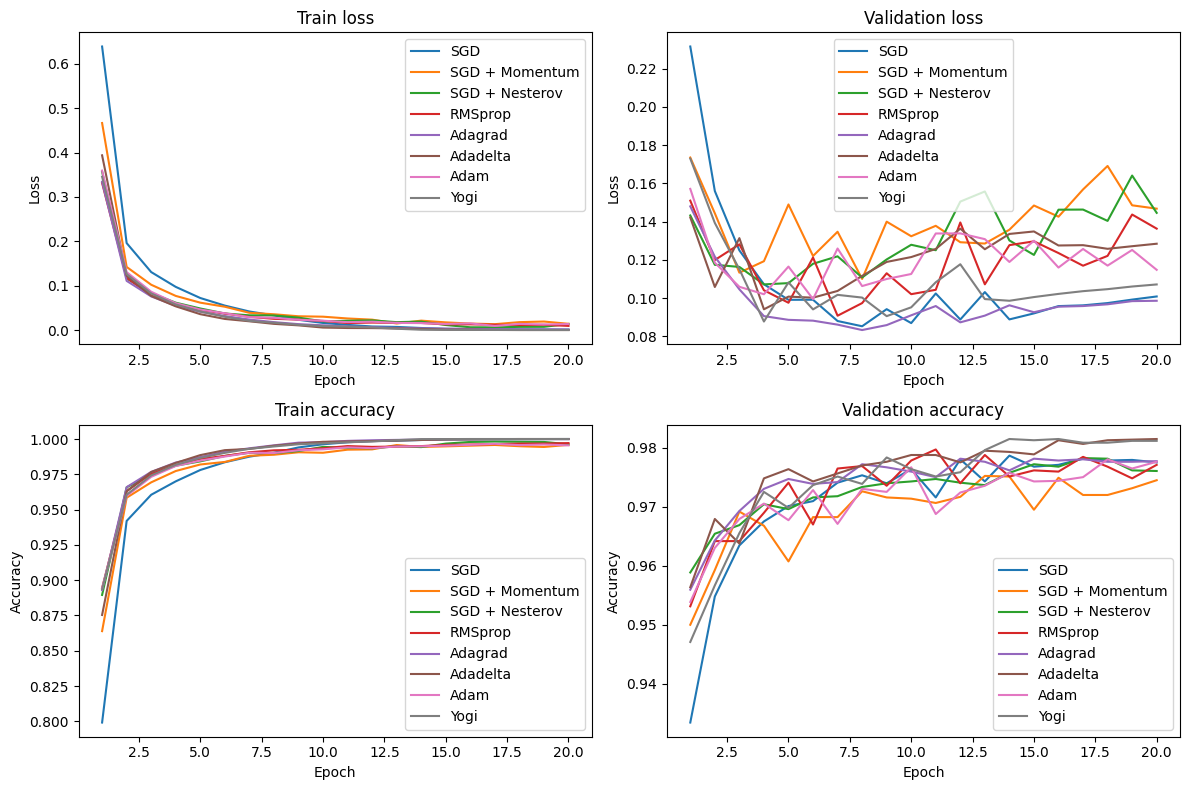

In [13]:
import matplotlib.pyplot as plt
epochs = np.arange(1, num_epochs + 1)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1. Train loss
ax = axes[0, 0]
for opt_name, hist in all_histories.items():
    ax.plot(epochs, hist["train_loss"], label=opt_name)
ax.set_title("Train loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.legend()

# 2. Val loss
ax = axes[0, 1]
for opt_name, hist in all_histories.items():
    ax.plot(epochs, hist["val_loss"], label=opt_name)
ax.set_title("Validation loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.legend()

# 3. Train accuracy
ax = axes[1, 0]
for opt_name, hist in all_histories.items():
    train_acc = [float(a.cpu()) for a in hist["train_acc"]]
    ax.plot(epochs, train_acc, label=opt_name)
ax.set_title("Train accuracy")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend()

# 4. Val accuracy
ax = axes[1, 1]
for opt_name, hist in all_histories.items():
    train_acc = [float(a.cpu()) for a in hist["val_acc"]]
    ax.plot(epochs, train_acc, label=opt_name)
ax.set_title("Validation accuracy")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend()
plt.tight_layout()
plt.show()



#### 1. Tốc độ hội tụ

Nhìn vào train loss/accuracy theo epoch:

*   Tất cả các thuật toán đều giảm loss rất nhanh trong 3–4 epoch đầu và đạt train accuracy > 0.97.
*   Thuật toán thích nghi (Adagrad, Adadelta, RMSprop, Adam, Yogi) và SGD + Nesterov đạt val_acc ≈ 0.97 chỉ sau khoảng 4 epoch
*   SGD thuần cần khoảng 5 epoch để vượt mốc 0.97 val_acc.
*   SGD + Momentum hội tụ chậm hơn rõ rệt về phía validation: phải đến khoảng epoch 8 mới đạt val_acc > 0.97.

Kết luận về tốc độ hội tụ:

* Nhóm AdaGrad, Adadelta, Adam, Yogi, RMSprop, SGD + Nesterov có tốc độ hội tụ nhanh, đặc biệt trong 3–5 epoch đầu.

* SGD + Momentum không cải thiện rõ tốc độ hội tụ so với SGD thuần về mặt val_acc trong cấu hình thí nghiệm này.


#### 2. Độ ổn định (dao động loss/accuracy)

Quan sát hai đồ thị validation loss/accuracy:

*   SGD: Sau khi loss giảm mạnh ở vài epoch đầu, đường val_loss dao động nhẹ xung quanh ~0.09–0.10. al_acc tăng đều rồi tiến dần đến ~0.978, đường cong khá mượt → ổn định.

*   SGD + Momentum / SGD + Nesterov: val_loss dao động mạnh hơn, có lúc tăng lên 0.14–0.16 ở giai đoạn sau. val_acc răng cưa hơn, có những epoch giảm đáng kể rồi tăng trở lại → cho thấy các bước cập nhật có xu hướng quá mạnh, dẫn đến quỹ đạo tối ưu kém ổn định trên tập validation.

*   RMSprop: val_loss dao động trung bình, không quá lớn nhưng không mượt bằng Adagrad/Yogi. val_acc dao động quanh 0.978–0.979, tương đối ổn định nhưng vẫn có vài điểm rơi.

*   Adagrad: val_loss giảm nhanh về vùng thấp (~0.09) và dao động nhỏ. val_acc tăng đều, dao động hẹp quanh ~0.978 → khá ổn định.

*  Adadelta: val_loss thấp nhưng dao động ở khoảng 0.12–0.14. val_acc vẫn tăng đều và duy trì quanh 0.98, nhìn chung ổn định, không có suy giảm rõ rệt ở cuối quá trình.

*  Adam: val_loss giảm nhanh trong 3–4 epoch đầu, sau đó dao động quanh 0.11–0.13, không đơn điệu. val_acc tăng nhanh, nhưng ở giữa và cuối training có vài epoch “tụt nhẹ” rồi phục hồi → ổn định vừa phải, có dao động nhưng không quá lớn.

*  Yogi: val_loss giảm nhanh và dao động tương đối nhỏ quanh 0.095–0.11. val_acc tăng nhanh lên ~0.98 và giữ khá mượt, các dao động nhỏ hơn Adam và momentum/Nesterov.

Kết luận về ổn định

*  Ổn định tốt: SGD, Adagrad, RMSprop, Adadelta, Yogi (dao động nhỏ hoặc vừa phải, không có xu hướng xấu đi rõ rệt).

*  Ổn định trung bình: Adam (dao động loss/acc rõ hơn Yogi).

*  Dao động lớn hơn: SGD + Momentum, SGD + Nesterov.

#### 3. Khả năng khái quát hóa (generalization)
Dựa trên bảng tổng hợp (train_loss, train_acc, val_loss, val_acc, test_acc):
Hầu hết thuật toán đều fit gần như hoàn hảo trên train (train_acc ≈ 0.996–1.0, train_loss rất nhỏ). → Độ khác biệt nằm chủ yếu ở val_loss, val_acc và test_acc.

**Test accuracy (xấp xỉ):**

- SGD: 0.9780
- SGD + Momentum: 0.9747 (thấp nhất trong các phương pháp)
- SGD + Nesterov: ≈0.9769
- RMSprop: 0.9779
- Adagrad: 0.9793
- Adadelta: 0.9816 (cao nhất)
- Adam: 0.9796
- Yogi: 0.9811

Khoảng cách train_acc – val_acc của các thuật toán đều khoảng 0.018–0.022  
→ Tất cả đều có mức overfitting nhẹ nhưng tương đương nhau, không có thuật toán nào bị quá khớp nghiêm trọng.

Adadelta và Yogi cho test_acc cao nhất (~0.981–0.982), dù Adadelta có val_loss hơi cao hơn (0.1284) so với Adagrad/Yogi. Điều này cho thấy trên bộ test, hai thuật toán này khái quát hóa tốt nhất trong thí nghiệm.

**Kết luận về khái quát hóa**

- Nhóm Adadelta, Yogi: khái quát hóa tốt nhất (test_acc cao nhất).
- Nhóm Adam, Adagrad, RMSprop, SGD: hiệu năng rất gần nhau (chênh lệch ~0.001–0.003).
- SGD + Momentum, SGD + Nesterov: hơi kém hơn một chút về test_acc trong thiết lập này.

#### 4. Nhận định cho từng thuật toán

---

#### **SGD**

- **Tốc độ hội tụ:** chậm hơn một chút ở giai đoạn đầu nhưng vẫn đạt hiệu năng tốt sau ~5 epoch.  
- **Ổn định:** đường val_loss/val_acc tương đối mượt, ít dao động mạnh.  
- **Khái quát hóa:** test_acc ~0.978, nằm trong nhóm khá; khoảng cách train–val hợp lý → mô hình ổn định, không quá phụ thuộc vào tối ưu thích nghi.

---

#### **SGD + Momentum**

- **Tốc độ hội tụ:** không cải thiện rõ rệt so với SGD về validation; cần nhiều epoch hơn để đạt 0.97 val_acc.  
- **Ổn định:** val_loss, val_acc dao động tương đối lớn.  
- **Khái quát hóa:** test_acc thấp nhất (~0.9747) → trong cấu hình này, momentum chưa mang lại lợi ích rõ rệt.

---

#### **SGD + Nesterov**

- **Tốc độ hội tụ:** khá nhanh (≈4 epoch đạt 0.97 val_acc).  
- **Ổn định:** dao động validation tương đối lớn, nhất là ở cuối training.  
- **Khái quát hóa:** test_acc ~0.9769, nhỉnh hơn momentum nhưng vẫn dưới nhóm adaptive.

---

#### **RMSprop**

- **Tốc độ hội tụ:** nhanh, tương đương nhóm adaptive khác.  
- **Ổn định:** loss/acc dao động trung bình, không quá xấu.  
- **Khái quát hóa:** test_acc ~0.9779, tương đương SGD, kém nhẹ Adagrad/Adam/Yogi.

---

#### **Adagrad**

- **Tốc độ hội tụ:** rất nhanh; từ epoch 4 đã có val_acc ~0.973.  
- **Ổn định:** đường val_loss khá mượt, dao động nhỏ; val_acc ổn định quanh 0.978.  
- **Khái quát hóa:** test_acc ~0.9793, thuộc nhóm tốt; khoảng cách train–val vừa phải.

---

#### **Adadelta**

- **Tốc độ hội tụ:** nhanh, đạt 0.97 val_acc từ sớm (epoch 4).  
- **Ổn định:** train_loss giảm rất mạnh đến gần 0; val_loss dao động quanh 0.12–0.14 nhưng không có xu hướng xấu đi.  
- **Khái quát hóa:** test_acc cao nhất (~0.9816), cùng với val_acc tốt nhất → trong thí nghiệm này, Adadelta là một trong những lựa chọn tối ưu nhất.

---

#### **Adam**

- **Tốc độ hội tụ:** rất nhanh cả trên train và val (0.97 val_acc sau 4 epoch).  
- **Ổn định:** có dao động moderate ở val_loss/val_acc, đôi khi val_loss tăng rồi giảm lại.  
- **Khái quát hóa:** test_acc ~0.9796, thuộc nhóm tốt nhưng không vượt Adadelta/Yogi; gap train–val tương tự các phương pháp khác → chưa thấy ưu thế rõ ràng so với Adadelta/Yogi về generalization.

---

#### **Yogi**

- **Tốc độ hội tụ:** nhanh tương đương Adam/Adadelta.  
- **Ổn định:** val_loss và val_acc khá mượt, dao động nhỏ hơn Adam; đường val_acc tăng đều và giữ quanh 0.981 ở cuối.  
- **Khái quát hóa:** test_acc ~0.9811, gần bằng Adadelta và cao hơn Adam một chút; train_acc = 1.0 nhưng val/test vẫn cao → minh họa phần nào ưu điểm của Yogi trong việc kiểm soát moment bậc hai và giữ cập nhật ổn định.

#### **Kết luận**

**Về tốc độ hội tụ:**  Các thuật toán thích nghi (Adagrad, RMSprop, Adadelta, Adam, Yogi) và SGD + Nesterov hội tụ nhanh hơn SGD thuần, đặc biệt trong 4 epoch đầu.

**Về độ ổn định:**  Yogi, Adagrad, SGD, RMSprop, Adadelta cho đường validation khá mượt;  
Adam ổn định trung bình;  
SGD + Momentum/Nesterov dao động nhiều hơn.

**Về khái quát hóa:**  Adadelta và Yogi đạt test_acc cao nhất (~0.981–0.982);  Adam, Adagrad, RMSprop, SGD ở mức rất gần nhau;  SGD + Momentum/Nesterov hơi kém hơn trong thiết lập này.

---
#### 5. Gợi ý lựa chọn thuật toán theo bối cảnh sử dụng

Việc lựa chọn thuật toán tối ưu phụ thuộc vào đặc tính dữ liệu, cấu trúc mô hình và yêu cầu huấn luyện. Trong các bài toán mà hàm mất mát có hình dạng phức tạp, độ cong thay đổi lớn hoặc gradient có phân bố không đều, các phương pháp thích nghi như Adam, Adagrad, Adadelta, RMSprop và Yogi thường cho hiệu quả cao nhờ khả năng điều chỉnh bước học theo từng tham số, giúp tăng tốc hội tụ ở giai đoạn đầu. Trong đó, Adadelta và Yogi phù hợp khi ưu tiên sự ổn định và khả năng khái quát hóa, còn Adam thích hợp cho các mô hình lớn có yêu cầu hội tụ nhanh. Ngược lại, nếu cần kiểm soát tốt hơn quỹ đạo cập nhật và hạn chế hiện tượng vượt mức, các phương pháp dựa trên SGD hoặc SGD kết hợp Momentum/Nesterov vẫn là lựa chọn đáng tin cậy, dù tốc độ hội tụ ban đầu có thể chậm hơn.

Trong thực hành, SGD thường được ưu tiên cho các bài toán lớn, dữ liệu sạch và mô hình sâu cần khả năng tổng quát tốt; trong khi Adam hoặc Yogi phù hợp với các bài toán có gradient nhiễu hoặc hàm mất mát khó tối ưu; còn Adadelta và Adagrad hữu ích khi muốn giảm phụ thuộc vào lựa chọn siêu tham số. Cuối cùng, việc thử nghiệm nhiều thuật toán trên tập dữ liệu cụ thể luôn cần thiết, bởi hiệu năng tối ưu chịu ảnh hưởng đáng kể từ đặc tính của hàm mất mát và mô hình trong từng trường hợp.